# Data Loading and Preprocessing

In [1]:
# !pip install seaborn
# !pip install wordcloud

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

## Load Data

In [3]:
# the dataset contains articles and their abstracts sourced from PubMed, covering scientific topics.
# source: ccdv/pubmed-summarization

In [4]:
# load train, test, val data

train_df = pd.read_csv("../data/pubmed_dataset/train.csv")
val_df = pd.read_csv("../data/pubmed_dataset/validation.csv")
test_df = pd.read_csv("../data/pubmed_dataset/test.csv")

## Pre Processing

## Train

In [5]:
# train data

train_df.head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...


In [6]:
#info 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119924 entries, 0 to 119923
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   article   117232 non-null  object
 1   abstract  119924 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [7]:
# null values

train_df.isnull().sum()

article     2692
abstract       0
dtype: int64

### Null Values

In [8]:
# remove null values

train_df.dropna(inplace=True)

len(train_df)

117232

In [9]:
# describe

train_df.describe()

,article,abstract
count,117232,117232
unique,116933,117154
top,\n,this regular feature of the journal includes a...
freq,96,5


### Duplicates

In [10]:
# we observe that there are repeating duplicate values

train_df[train_df['article'] == train_df['article'].mode()[0]]

,article,abstract
1576,\n,"in the present study , the antioxidant activit..."
1669,\n,glaucoma surgery is ripe for innovation . in t...
2436,\n,agastachis herba is one of the well - known me...
3428,\n,we report a case of 18-year - old boy who pres...
3770,\n,tooth carving is an important practical precli...
...,...,...
115417,\n,stress response mediator activating transcript...
115976,\n,the present study investigates the interaction...
118776,\n,"in our recently published article , we investi..."
119035,\n,tumor thrombus from renal cell carcinoma is co...


In [11]:
train_df[train_df['abstract'] == train_df['abstract'].mode()[0]]

,article,abstract
15348,this article presents statistics on health car...,this regular feature of the journal includes a...
33437,this article presents statistics on health car...,this regular feature of the journal includes a...
49383,this article presents statistics on health car...,this regular feature of the journal includes a...
59407,this article presents statistics on health car...,this regular feature of the journal includes a...
80974,this article presents statistics on health car...,this regular feature of the journal includes a...


In [12]:
# remove repeating duplicates of articles

while True:
    # mode of article
    mode_article = train_df['article'].mode()[0]
    
    if train_df['article'].value_counts().max() > 1:
        train_df = train_df[train_df['article'] != mode_article]
    else:
        break

In [13]:
len(train_df)

116852

In [14]:
# remove repeating duplicates of abstracts

while True:
    # mode of abstract
    mode_abstract = train_df['abstract'].mode()[0]
    
    if train_df['abstract'].value_counts().max() > 1:
        train_df = train_df[train_df['abstract'] != mode_abstract]
    else:
        break

In [15]:
len(train_df)

116822

### Short articles

In [16]:
# very short articles tend to be invalid

train_df[train_df['article'].str.len() < 2000].sort_values(by='article')

,article,abstract
96024,\n \n \n,cultural transmission of reproductive success ...
26122,\n \n \n \n,highlightsno \n established causative link bet...
94763,\n \n \n \n \n \n,lessonprimary polydipsia occurs in up to 25% o...
67410,\n \n \n \n \n studies done in the patien...,highlightswe evaluated cardiopulmonary impairm...
6772,\n \n \n \n all authors were involved in d...,highlightsit is important to accurately diagno...
...,...,...
31201,xenopus neural crest was labelled with nuclear...,contact inhibition of locomotion was discovere...
36784,"xlf , atm , atm , h2ax and h2ax and hl mice ...",classical non - homologous dna end - joining (...
101221,yasser sakr and konrad reinhart we read with i...,the observation of sakr and colleagues that tr...
25478,"yeast strain by4742 , inp1 - 5xgfp , mcherry -...",the formation of membrane contact sites betwee...


In [17]:
# remove short articles

train_df = train_df[train_df['article'].str.len() >= 2000]
len(train_df)

115386

### Abstract inconsistencies

In [18]:
train_df[train_df['abstract'].str.startswith('abstract')]

# some words like 'abstract' are concatenated without space leading to invalid words

,article,abstract
33,4cl4-coumarate : coa ligasecas9crispr - associ...,abstractthe crispr / cas9 technology is a welc...
234,"like most other cells and organisms , bacteria...",abstractvirus - host interaction is a key proc...
274,asthma is a chronic inflammatory disease of th...,"abstractobjective : to identify , characterize..."
450,the world health organization ( who ) has esti...,abstractproteinuria in hypertension is an earl...
453,"in october 2011 , the u.s . national science a...",abstractthe national science advisory board fo...
...,...,...
119814,"desmoid tumors ( dts ) , also known as aggress...",abstractdesmoid tumors ( dts ) are a group of ...
119822,although surgical resection is the preferred t...,abstractimaging is important in the decision -...
119828,athletes either walk or run prior to executing...,abstractlots of athletic skills performed duri...
119870,deep sternal wound infection ( dswi ) is a rar...,abstractdeep sternal wound infection is a seve...


In [19]:
# remove 'abstract' from the start of abstracts

train_df.loc[train_df['abstract'].str.startswith('abstract'), 'abstract'] = train_df['abstract'].str.replace(r'^(abstract)\s*', '', regex=True).str.strip()

In [20]:
# background

train_df[train_df['abstract'].str.contains('background')]

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
5,"world - wide , infertility affects 1015% of co...",backgroundmicrornas ( mirnas ) play pivotal ro...
7,diabetes decreases the overall life expectancy...,type 2 diabetes is characterized by insulin re...
9,agenesis of the inferior vena cava ( ivc ) as ...,background : agenesis of the inferior vena cav...
...,...,...
119868,tobacco smoking is the most attributable and p...,backgroundfew studies have investigated differ...
119878,vasospastic disorder ( vd ) is a relatively co...,backgroundassessing therapeutic efficacy and p...
119891,scorpion envenomation is one of the main probl...,background : the aim of this study was to inve...
119921,in most of the peer review publications in the...,backgroundthe objective of this study was to a...


In [21]:
train_df[train_df['abstract'].str.startswith('background')].iloc[1][1]

# background, methods, conclusion etc. dont have space after them

'backgroundanemia in patients with cancer who are undergoing active therapy is commonly encountered and may worsen quality of life in these patients . the effect of blood transfusion is often temporary and may be associated with serious adverse events . \n erythropoiesis - stimulating agents are not effective in 30%50% of patients and may have a negative effect on overall survival.aimsto assess the efficacy and feasibility of intravenous iron therapy in patients with cancer who have non - iron - deficiency anemia and who are undergoing treatment with chemotherapy without the use of erythropoiesis - stimulating agents.methodsadult patients with solid cancers and non - iron - deficiency anemia were included . \n ferric sucrose at a dose of 200 mg was given in short intravenous infusions weekly for a total of 12 weeks . \n hemoglobin level was measured at baseline , every 3 weeks , and 2 weeks after the last iron infusion ( week 14 ) . \n adverse events related to intravenous iron were pr

In [22]:
# check if there is space after 'background' and if not insert space

train_df['abstract'] = train_df['abstract'].str.replace(r'background(?!\.)', 'background  ', regex=True)

In [23]:
train_df[train_df['abstract'].str.startswith('background')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
9,agenesis of the inferior vena cava ( ivc ) as ...,background : agenesis of the inferior vena c...
14,a review of the literature and an extensive me...,background a review of the literature and an ...


In [24]:
# similarly for other words

train_df[train_df['abstract'].str.contains('aims')]

,article,abstract
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
120,recent whole transcriptome studies have reveal...,noncode ( http://www.bioinfo.org/noncode/ ) is...
177,the goal of defibrillation ( df ) testing is t...,aimsthis trial was designed to test the hypoth...
187,emergence of new concepts in the management of...,background : various histopathological chang...
267,primary hyperparathyroidism ( phpt ) is a dise...,background : although primary hyperparathyro...
...,...,...
119728,raised intracranial pressure ( icp ) is usuall...,background and aims : the aim was to evaluat...
119759,the two main reasons for wanting to simulate g...,a number of programs have been developed for s...
119786,the pattern of drinking in india has undergone...,aims : to study the demographic factors associ...
119889,"adipose tissue , once just believed a passive ...",aims . our group investigated albumin gene exp...


In [25]:
train_df['abstract'] = train_df['abstract'].str.replace(r'aims(?!\.)', 'aims  ', regex=True)

In [26]:
train_df[train_df['abstract'].str.contains('aims')].head()

,article,abstract
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
120,recent whole transcriptome studies have reveal...,noncode ( http://www.bioinfo.org/noncode/ ) is...
177,the goal of defibrillation ( df ) testing is t...,aims this trial was designed to test the hypo...
187,emergence of new concepts in the management of...,background : various histopathological chang...
267,primary hyperparathyroidism ( phpt ) is a dise...,background : although primary hyperparathyro...


In [27]:
train_df[train_df['abstract'].str.contains('aim')]

,article,abstract
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
24,musculoskeletal tissues show increased bone fr...,musculoskeletal disorders are among the most c...
41,"since the dawn of history , nature and natural...",background the abortifacient claim of senna a...
49,these tumors are classified as typical net ( t...,purposeappendiceal tumors are a heterogeneous ...
63,the relation between chronic subclinical low -...,fasting plasma glucose ( fpg ) and hemoglobin ...
...,...,...
119913,although levodopa ( ld ) still remains the gol...,the aim of this article is to provide a short ...
119915,fibromyalgia is a chronic pain syndrome of unk...,fibromyalgia is a chronic pain syndrome charac...
119918,postmenopausal osteoporosis is a systemic skel...,the aim of this longitudinal study is to prese...
119920,fiber post systems are routinely used in resto...,aims and objectives : to study the stress co...


In [28]:
train_df['abstract'] = train_df['abstract'].str.replace(r'aim(?!s|ed|ing|\.)(?=[^\s])', 'aim  ', regex=True)

In [29]:
train_df[train_df['abstract'].str.startswith('aim')]

,article,abstract
96,the function of sensory receptors ( nrec ) in ...,aim : a study was performed on the articular d...
170,"before discussing the methodology , a detailed...",aim : the aim of this study is to evaluate the...
177,the goal of defibrillation ( df ) testing is t...,aims this trial was designed to test the hypo...
197,the diagnosis and extent of resection in the m...,aim : to evaluate the efficacy of calretinin i...
296,"ceramic and composite resin , esthetic dental ...",aim : the aim of the study was to investigate ...
...,...,...
119786,the pattern of drinking in india has undergone...,aims : to study the demographic factors asso...
119826,resin based dental composites are gaining a wi...,aim : to assess the microtensile bond strength...
119829,diabetic retinopathy ( dr ) remains a common c...,aim . to determine the influence of age at ons...
119889,"adipose tissue , once just believed a passive ...",aims . our group investigated albumin gene e...


In [30]:
train_df[train_df['abstract'].str.startswith('methods')]

,article,abstract
1360,one major goal of proteomic profiling \n is an...,"methods for isobaric tagging of peptides , itr..."
4113,open surgical repair with graft implantation h...,"methods : 21 patients ( 17 men , 4 women ; mea..."
5599,elucidation of protein protein interactions c...,methods for determining protein protein inter...
24632,children with central precocious puberty ( cpp...,methods . \n this prospective us multicenter t...
33773,alternative taxon sampling strategies are know...,methods for estimating divergence times from m...
38294,the incidence of esophageal cancer continues t...,methods and study aims : the incidence of es...
45980,abdominal aortic aneurysm ( aaa ) affects 25% ...,methodswe conducted a systematic review and me...
53991,aneurysmal subarachnoid hemorrhage ( asah ) is...,methods . ameijeiras brother 's and cmdt . ...
54102,"currently , the detection and diagnosis of par...",methods for the diagnosis of infectious diseas...
56610,structural biology efforts are often hampered ...,methods to efficiently determine the phase beh...


In [31]:
train_df['abstract'] = train_df['abstract'].str.replace(r'methods(?!\.)', 'methods  ', regex=True)

In [32]:
train_df[train_df['abstract'].str.startswith('methods')].head()

,article,abstract
1360,one major goal of proteomic profiling \n is an...,"methods for isobaric tagging of peptides , i..."
4113,open surgical repair with graft implantation h...,"methods : 21 patients ( 17 men , 4 women ; m..."
5599,elucidation of protein protein interactions c...,methods for determining protein protein int...
24632,children with central precocious puberty ( cpp...,methods . \n this prospective us multicenter...
33773,alternative taxon sampling strategies are know...,methods for estimating divergence times from...


In [33]:
train_df['abstract'] = train_df['abstract'].str.replace(r'conclusions(?!\.)', 'conclusions  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'conclusion(?!s|\.)(?=[^\s])', 'conclusion  ', regex=True)

In [34]:
train_df[train_df['abstract'].str.contains('conclusion')].iloc[1][1]

'background  anemia in patients with cancer who are undergoing active therapy is commonly encountered and may worsen quality of life in these patients . the effect of blood transfusion is often temporary and may be associated with serious adverse events . \n erythropoiesis - stimulating agents are not effective in 30%50% of patients and may have a negative effect on overall survival.aims  to assess the efficacy and feasibility of intravenous iron therapy in patients with cancer who have non - iron - deficiency anemia and who are undergoing treatment with chemotherapy without the use of erythropoiesis - stimulating agents.methods  adult patients with solid cancers and non - iron - deficiency anemia were included . \n ferric sucrose at a dose of 200 mg was given in short intravenous infusions weekly for a total of 12 weeks . \n hemoglobin level was measured at baseline , every 3 weeks , and 2 weeks after the last iron infusion ( week 14 ) . \n adverse events related to intravenous iron w

In [35]:
train_df[train_df['abstract'].str.contains('objectives')]

,article,abstract
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19 -...
29,small bowel obstruction ( sbo ) is one of the ...,background and objectives : there is a wide ...
48,"fnas represent an advantageous , effective mea...","in this era of precision medicine , our unders..."
71,care coordination is an important aspect of nu...,introductioncare coordination is an important ...
99,"milrinone , a phosphodiesterase iii inhibitor ...",background and objectivesmilrinone is often ...
...,...,...
119857,it is well known that hearing levels progressi...,background and objectivesthe purpose of the ...
119869,autogenous bone is considered the best choice ...,objectives : the aim of this study was to hist...
119885,hepatectomy is established as a standard of ca...,objectives . this study is a questionnaire sur...
119888,the prevalence of type 2 diabetes ( t2d ) in r...,objectives . type 2 diabetes ( t2d ) with keto...


In [36]:
train_df['abstract'] = train_df['abstract'].str.replace(r'objectives(?!\.)', 'objectives  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'objective(?!s|\.)(?=[^\s])', 'objective  ', regex=True)

In [37]:
train_df[train_df['abstract'].str.contains('objectives')].head()

,article,abstract
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19 -...
29,small bowel obstruction ( sbo ) is one of the ...,background and objectives : there is a wid...
48,"fnas represent an advantageous , effective mea...","in this era of precision medicine , our unders..."
71,care coordination is an important aspect of nu...,introductioncare coordination is an important ...
99,"milrinone , a phosphodiesterase iii inhibitor ...",background and objectives milrinone is ofte...


In [38]:
train_df[train_df['abstract'].str.contains('summary')]

,article,abstract
35,ionic calcium ( ca ) controls multiple cellula...,ca2+/calmodulin - dependent protein kinase ii ...
111,this case describes a young non - pregnant cat...,case summarythis case describes a young non - ...
131,"young , healthy organisms strive to maintain t...",summarylow - complexity prion - like domains...
183,skin is the largest sensory organ of the body ...,summarycutaneous c - unmyelinated mrgprd+ free...
238,osteoarthritis ( oa ) is the most common form ...,summarybackground celecoxib has a positive ef...
...,...,...
119596,"how should patient categories , or case - mix ...",this article discusses the severity of illness...
119742,recent evidences support using paclitaxel drug...,background : studies examining the efficienc...
119744,neurons arise from a small set of progenitor c...,summaryneurons in the mammalian neocortex aris...
119768,migraine is a chronic neurological disorder af...,migraine is among the 10 most disabling disord...


In [39]:
train_df['abstract'] = train_df['abstract'].str.replace(r'summary(?!\.)', '', regex=True)

In [40]:
train_df[train_df['abstract'].str.contains('summary')].head()

,article,abstract


In [41]:
train_df[train_df['abstract'].str.startswith('purpose')]

,article,abstract
18,"in past years , numerous studies have describe...",purpose : to investigate to what degree the pr...
28,central retinal vein occlusion ( crvo ) is a c...,purposeto evaluate the association between the...
43,"the three main arteries of the leg , the anter...",purpose : a further understanding of the anter...
49,these tumors are classified as typical net ( t...,purposeappendiceal tumors are a heterogeneous ...
52,an estimated 170 million people worldwide have...,purposeto evaluate retinopathy associated with...
...,...,...
119772,retinal vein occlusion ( rvo ) is the second m...,purpose : to evaluate the effects of vitrectom...
119839,\n lateral patellar dislocation ( lpd ) is su...,purposethe geometry of the tibial plateau and ...
119849,"recently , stem cell is the much - anticipated...","purposethese days , mesenchymal stem cells ( m..."
119879,endophthalmitis caused by filamentous fungi ha...,purposeto report outcomes of exogenous fungal ...


In [42]:
train_df['abstract'] = train_df['abstract'].str.replace(r'purpose(?!s|ed|ing|less|\.)(?=[^\s])', 'purpose  ', regex=True)

In [43]:
train_df[train_df['abstract'].str.startswith('purpose')].head()

,article,abstract
18,"in past years , numerous studies have describe...",purpose : to investigate to what degree the pr...
28,central retinal vein occlusion ( crvo ) is a c...,purpose to evaluate the association between t...
43,"the three main arteries of the leg , the anter...",purpose : a further understanding of the anter...
49,these tumors are classified as typical net ( t...,purpose appendiceal tumors are a heterogeneou...
52,an estimated 170 million people worldwide have...,purpose to evaluate retinopathy associated wi...


In [44]:
train_df[train_df['abstract'].str.contains('abstracta')]

,article,abstract
28375,a surprisingly high co2-selectivity ( 9599.6% ...,graphical abstracta surprisingly high co2-sele...
29070,"mes - p(tms)2 ( 2 ) \n ( 408 mg , 1.37 mmol ...",graphical abstracta novel bis - phosphaalkenyl...
53456,all operations were carried out in moisture- a...,graphical abstracta series of new yttrium alko...
96726,reconstruction of medium - sized oral and phar...,graphical abstractaxial view of the cheek at t...
102109,heterogeneity in parasite burdens within and a...,graphical abstractage abundance profile for t...


In [45]:
train_df['abstract'] = train_df['abstract'].str.replace(r'abstract(?!s|ed|ing|ion|ions|ness|edly|\.)(?=[^\s])', 'abstract  ', regex=True)

In [46]:
train_df[train_df['abstract'].str.contains('abstracta')]

,article,abstract


In [47]:
train_df[train_df['abstract'].str.contains('introduction')]

,article,abstract
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19 -...
26,m1dg ( 3-(2-deoxy--d - erythro - pentofuranosy...,oxidative stress triggers dna and lipid peroxi...
39,infertility is one of the crucial and critical...,introduction : the process of assisted reprodu...
40,balance impairment is an important fall - risk...,introduction . \n low serum vitamin d levels a...
71,care coordination is an important aspect of nu...,introductioncare coordination is an important ...
...,...,...
119720,cone beam computed tomography ( cbct ) has fou...,introduction . \n the aim of this study was to...
119770,thanks to good preventive dental programs and ...,introduction : dentine hypersensitivity is cha...
119824,food and nutrition are basic human needs and p...,introductionfood security has been defined as ...
119832,skeletal class iii anomalies are associated wi...,introduction . \n numerous devices have been i...


In [48]:
train_df['abstract'] = train_df['abstract'].str.replace(r'introduction(?!\.)', 'introduction  ', regex=True)

In [49]:
train_df[train_df['abstract'].str.startswith('introduction')].head()

,article,abstract
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
39,infertility is one of the crucial and critical...,introduction : the process of assisted repro...
40,balance impairment is an important fall - risk...,introduction . \n low serum vitamin d levels...
71,care coordination is an important aspect of nu...,introduction care coordination is an importan...
72,the irrevocable aim of endodontics is a three ...,introduction : the objective of this study w...


In [50]:
train_df[train_df['abstract'].str.contains('method')]

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
6,midwife - led primary delivery care for low -...,objective . \n the objective of this study was...
10,an exponential rise in alzheimer 's disease ( ...,we examined the usefulness of brief neuropsych...
...,...,...
119901,the basic fasting protocol is to transfer the ...,a convenient method for chemically treating ze...
119920,fiber post systems are routinely used in resto...,aims and objectives : to study the stress ...
119921,in most of the peer review publications in the...,background the objective of this study was to...
119922,\n the reveal registry is a longitudinal regi...,background : patients with pulmonary arteria...


In [51]:
train_df['abstract'] = train_df['abstract'].str.replace(r'method(?!s|ical|ically|ology|ologies|\.)(?=[^\s])', 'method  ', regex=True)

In [52]:
train_df[train_df['abstract'].str.contains('method')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
6,midwife - led primary delivery care for low -...,objective . \n the objective of this study was...
10,an exponential rise in alzheimer 's disease ( ...,we examined the usefulness of brief neuropsych...


In [53]:
train_df[train_df['abstract'].str.contains('result')]

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
...,...,...
119892,solitary plasmacytomas ( sp ) result from mono...,plasma cell neoplasms result from monoclonal p...
119920,fiber post systems are routinely used in resto...,aims and objectives : to study the stress ...
119921,in most of the peer review publications in the...,background the objective of this study was to...
119922,\n the reveal registry is a longitudinal regi...,background : patients with pulmonary arteria...


In [54]:
train_df['abstract'] = train_df['abstract'].str.replace(r'results(?!\.)', 'results  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'result(?!s|ing|ed|ant|\.)(?=[^\s])', 'result  ', regex=True)

In [55]:
train_df[train_df['abstract'].str.contains('result')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
1,it occurs in more than 50% of patients and may...,background anemia in patients with cancer who...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...


In [56]:
train_df[train_df['abstract'].str.contains('discussion')]

,article,abstract
21,given the risk of paralysis associated with ce...,background given the risk of paralysis associ...
57,gestational trophoblastic disease describes a ...,background : invasive mole is responsible fo...
71,care coordination is an important aspect of nu...,introduction care coordination is an importan...
191,in all well developed societies there tend to ...,introduction organizations can be regarded as...
322,"between 1903 and 1906 , oswaldo cruz , directo...",this article addresses the discussion about qu...
...,...,...
119216,generally pediatric elbow dislocations are com...,introduction elbow dislocations in children a...
119236,the who - unfpa has clearly identified mater...,the framework provided by the millennium devel...
119512,endometriosis involving the intestines occurs ...,introduction isolated endometriosis of the in...
119596,"how should patient categories , or case - mix ...",this article discusses the severity of illness...


In [57]:
train_df['abstract'] = train_df['abstract'].str.replace(r'discussion(?!s|\.)(?=[^\s])', 'discussion  ', regex=True)

In [58]:
train_df[train_df['abstract'].str.contains('discussion')].head()

,article,abstract
21,given the risk of paralysis associated with ce...,background given the risk of paralysis associ...
57,gestational trophoblastic disease describes a ...,background : invasive mole is responsible fo...
71,care coordination is an important aspect of nu...,introduction care coordination is an importan...
191,in all well developed societies there tend to ...,introduction organizations can be regarded as...
322,"between 1903 and 1906 , oswaldo cruz , directo...",this article addresses the discussion about qu...


In [59]:
train_df[train_df['abstract'].str.contains('acknowledgment')]

,article,abstract
27623,data reported in this paper were presented at ...,viral hepatitis b is a vaccine - preventable d...
50418,this article was based on a research proposal ...,accountable care organizations ( acos ) in the...
53597,the authors thank dr . ap . cant and dr d. cer...,background clinical governance is considered ...
53973,when we were first invited to write these colu...,six years after the initial vision and change ...
62572,"gluteal artery aneurysm is very rare , account...",blunt traumatic injuries to the superior glute...
71339,the authors would like to thank tor anvik for ...,background our aim was to investigate the pat...
98467,"montreal , quebec , gnome qubec and the minist...",the aim of this research was to conduct a thor...
100969,endophthalmitis is a devastating intraocular i...,purpose to report the first case to our knowl...
115739,recent studies have identified assisted reprod...,background ovarian pregnancy is a rare and ch...


In [60]:
train_df['abstract'] = train_df['abstract'].str.replace(r'acknowledgments(?!\.)', 'results  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'acknowledgment(?!s|\.)(?=[^\s])', 'acknowledgment  ', regex=True)

In [61]:
train_df[train_df['abstract'].str.contains('acknowledgment')].head()

,article,abstract
53973,when we were first invited to write these colu...,six years after the initial vision and change ...
62572,"gluteal artery aneurysm is very rare , account...",blunt traumatic injuries to the superior glute...
100969,endophthalmitis is a devastating intraocular i...,purpose to report the first case to our knowl...
115739,recent studies have identified assisted reprod...,background ovarian pregnancy is a rare and ch...


In [62]:
train_df[train_df['abstract'].str.contains('review')]

,article,abstract
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
14,a review of the literature and an extensive me...,background a review of the literature and an ...
29,small bowel obstruction ( sbo ) is one of the ...,background and objectives : there is a wid...
37,the centers for disease control and prevention...,objective . to examine risk factors for false ...
48,"fnas represent an advantageous , effective mea...","in this era of precision medicine , our unders..."
...,...,...
119877,on reviewing with a detailed approach to title...,oral ulcers are a common symptom in clinical p...
119899,the implication of inflammation in the develop...,"liver cancer , primarily hepatocellular carcin..."
119902,"neuropathic pain , defined as pain arising as...",post - herpetic neuralgia ( phn ) is neuropath...
119913,although levodopa ( ld ) still remains the gol...,the aim of this article is to provide a short ...


In [63]:
train_df['abstract'] = train_df['abstract'].str.replace(r'reviews(?!|\.)', 'reviews  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'review(?!s|ed|ing|er|ers|able|\.)(?=[^\s])', 'review  ', regex=True)

In [64]:
train_df[train_df['abstract'].str.contains('review')].head()

,article,abstract
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
14,a review of the literature and an extensive me...,background a review of the literature and an ...
29,small bowel obstruction ( sbo ) is one of the ...,background and objectives : there is a wid...
37,the centers for disease control and prevention...,objective . to examine risk factors for false ...
48,"fnas represent an advantageous , effective mea...","in this era of precision medicine , our unders..."


In [65]:
train_df[train_df['abstract'].str.contains('importance')]

,article,abstract
69,optimal treatment of cancers in children often...,treatment of cancer in children often requires...
194,bicipital groove ( bg ) is an indentation on t...,the variant morphometry of bicipital groove is...
213,parenting stress escalates at a much faster ra...,[ purpose ] the purpose of this research was t...
232,altmetrics creates a new approach to evaluatin...,"in this study , we investigated the impact of ..."
234,"like most other cells and organisms , bacteria...",virus - host interaction is a key process in u...
...,...,...
119817,several strategies are used to reduce blood lo...,background adequate hemostasis in cranial and...
119838,quorum sensing ( qs ) is a key regulator of vi...,quorum sensing ( qs ) is a key regulator of vi...
119877,on reviewing with a detailed approach to title...,oral ulcers are a common symptom in clinical p...
119904,emergency department ( ed ) use is common for ...,parents frequently bring their children to gen...


In [66]:
train_df['abstract'] = train_df['abstract'].str.replace(r'importance(?!s|\.)(?=[^\s])', 'importance  ', regex=True)

In [67]:
train_df[train_df['abstract'].str.contains('importance')].head()

,article,abstract
69,optimal treatment of cancers in children often...,treatment of cancer in children often requires...
194,bicipital groove ( bg ) is an indentation on t...,the variant morphometry of bicipital groove is...
213,parenting stress escalates at a much faster ra...,[ purpose ] the purpose of this research was t...
232,altmetrics creates a new approach to evaluatin...,"in this study , we investigated the impact of ..."
234,"like most other cells and organisms , bacteria...",virus - host interaction is a key process in u...


In [68]:
train_df[train_df['abstract'].str.contains('hypothesis')]

,article,abstract
23,alzheimer 's disease ( ad ) is a neurodegenera...,the amyloid cascade hypothesis remains a robus...
35,ionic calcium ( ca ) controls multiple cellula...,ca2+/calmodulin - dependent protein kinase ii ...
132,\n hearing loss is a significant public healt...,objectives / hypothesisto evaluate the safet...
177,the goal of defibrillation ( df ) testing is t...,aims this trial was designed to test the hypo...
253,macula - on rhegmatogenous retinal detachment ...,purpose . to quantify the frequency of visual ...
...,...,...
119428,the majority of chromosomal rearrangements in ...,we describe a case of acute myeloid leukemia m...
119447,this was a historical cohort study using data ...,objective : to investigate the effect of autoi...
119477,diphyllobothriasis is caused by the adult tape...,diphyllobothrium latum and diphyllobothrium ni...
119639,linkage analyses performed in the early 1990s ...,the analyses of genetic factors contributing t...


In [69]:
train_df['abstract'] = train_df['abstract'].str.replace(r'hypothesis(?!s|\.)(?=[^\s])', 'hypothesis  ', regex=True)

In [70]:
train_df[train_df['abstract'].str.contains('hypothesis')].head()

,article,abstract
23,alzheimer 's disease ( ad ) is a neurodegenera...,the amyloid cascade hypothesis remains a robus...
35,ionic calcium ( ca ) controls multiple cellula...,ca2+/calmodulin - dependent protein kinase ii ...
132,\n hearing loss is a significant public healt...,objectives / hypothesis to evaluate the saf...
177,the goal of defibrillation ( df ) testing is t...,aims this trial was designed to test the hypo...
253,macula - on rhegmatogenous retinal detachment ...,purpose . to quantify the frequency of visual ...


In [71]:
train_df[train_df['abstract'].str.contains('material')]

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
17,primary diffuse leptomeningeal gliomatosis ( p...,objective primary diffuse leptomeningeal glio...
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
39,infertility is one of the crucial and critical...,introduction : the process of assisted repro...
...,...,...
119849,"recently , stem cell is the much - anticipated...","purpose these days , mesenchymal stem cells (..."
119861,the recommended treatments for acne include to...,background to treat moderate to severe acne v...
119869,autogenous bone is considered the best choice ...,objectives : the aim of this study was to hi...
119878,vasospastic disorder ( vd ) is a relatively co...,background assessing therapeutic efficacy and...


In [72]:
train_df['abstract'] = train_df['abstract'].str.replace(r'material(?!s|\.)(?=[^\s])', 'material  ', regex=True)

In [73]:
train_df[train_df['abstract'].str.contains('material')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
17,primary diffuse leptomeningeal gliomatosis ( p...,objective primary diffuse leptomeningeal glio...
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
39,infertility is one of the crucial and critical...,introduction : the process of assisted repro...


In [74]:
train_df[train_df['abstract'].str.contains('studya')]

,article,abstract
4642,the chemokine proteins are a class of small mo...,background and purpose of the studya quantit...
23955,technika przezcewnikowej wymiany zastawki aort...,introduction transcatheter aortic valve repla...
58478,ze wzgldu na rozwj choroby niedokrwiennej serc...,introduction taking into consideration the ri...
60026,the patients for this study were selected from...,aims and objectives : obtaining root cover...
68196,\n pathology revealed invasive small cell neu...,background small cell neuroendocrine carcinom...
84980,"neutrophil count , lymphocyte count and neutro...",aim of the studyatherosclerosis represents act...
87555,non - infectious diseases comprise 43% of the ...,"background smoking has physical , psychologi..."
101295,\n w latach 19962012 leczeniu poddano 10 pacj...,aim of the studyaim of the study is to present...
109841,human malaria is an important cause of mortali...,background and the purpose of the studyartem...
113116,urinary tract infection ( uti ) is the most co...,background : urinary tract infection ( uti )...


In [75]:
train_df['abstract'] = train_df['abstract'].str.replace(r'study(?!ing|\.)(?=[^\s])', 'study  ', regex=True)

In [76]:
train_df[train_df['abstract'].str.contains('study')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
5,"world - wide , infertility affects 1015% of co...",background micrornas ( mirnas ) play pivotal ...
6,midwife - led primary delivery care for low -...,objective . \n the objective of this study was...
7,diabetes decreases the overall life expectancy...,type 2 diabetes is characterized by insulin re...
8,lipid apheresis provides a safe and effective ...,lipid apheresis is used to treat patients with...


In [77]:
train_df[train_df['abstract'].str.contains('design')]

,article,abstract
7,diabetes decreases the overall life expectancy...,type 2 diabetes is characterized by insulin re...
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
37,the centers for disease control and prevention...,objective . to examine risk factors for false ...
38,childhood obesity is a serious and growing pub...,the present study was designed to explore the ...
58,an expanded research design and methods sectio...,objective it has been proposed that skeletal ...
...,...,...
119899,the implication of inflammation in the develop...,"liver cancer , primarily hepatocellular carcin..."
119913,although levodopa ( ld ) still remains the gol...,the aim of this article is to provide a short ...
119915,fibromyalgia is a chronic pain syndrome of unk...,fibromyalgia is a chronic pain syndrome charac...
119920,fiber post systems are routinely used in resto...,aims and objectives : to study the stress ...


In [78]:
train_df['abstract'] = train_df['abstract'].str.replace(r'design(?!s|ing|ed|er|ers|able|\.)(?=[^\s])', 'design  ', regex=True)

In [79]:
train_df[train_df['abstract'].str.contains('design')].head()

,article,abstract
7,diabetes decreases the overall life expectancy...,type 2 diabetes is characterized by insulin re...
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
37,the centers for disease control and prevention...,objective . to examine risk factors for false ...
38,childhood obesity is a serious and growing pub...,the present study was designed to explore the ...
58,an expanded research design and methods sectio...,objective it has been proposed that skeletal ...


In [80]:
train_df['abstract'] = train_df['abstract'].str.replace(r'subject(?!s|ed|ing|ive|ivity|ivities|ively|\.)(?=[^\s])', 'subject  ', regex=True)

In [81]:
train_df[train_df['abstract'].str.contains('subject')].head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried o...
7,diabetes decreases the overall life expectancy...,type 2 diabetes is characterized by insulin re...
10,an exponential rise in alzheimer 's disease ( ...,we examined the usefulness of brief neuropsych...
18,"in past years , numerous studies have describe...",purpose : to investigate to what degree the pr...
25,migraine is the leading neurological cause for...,although the association between episodic migr...


In [82]:
train_df['abstract'] = train_df['abstract'].str.replace(r'data(?!data|set|sets|less|dum)(?=[^\s])', 'data  ', regex=True)
train_df['abstract'] = train_df['abstract'].str.replace(r'database(?!s|ing)(?=\S)', 'database  ', regex=True)

In [83]:
train_df[train_df['abstract'].str.contains('data')].head()

,article,abstract
12,the wnt/-catenin pathway has been implicated i...,we have previously demonstrated that rad6 and ...
13,the guanine heterocyclic \n ring is rich in ch...,upon oxidation of the heterocyclic \n ring in ...
15,agriculture has been one of the primary econom...,this was a cross - sectional study that invest...
19,cancer is the second leading cause of mortalit...,introduction : breast cancer accounts for 19...
21,given the risk of paralysis associated with ce...,background given the risk of paralysis associ...


In [88]:
# save preprocessed train_df

folder = '../data/pubmed_dataset_preprocessed'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, 'train.csv')
train_df.to_csv(file_path, index=False)
print(f'DataFrame saved to {file_path}')

DataFrame saved to ../data/pubmet_dataset_preprocessed/train.csv


## Validation

In [89]:
# train data

val_df.head()

,article,abstract
0,venous thromboembolism ( vte ) comprising of d...,background and aim : there is lack of substant...
1,there is an epidemic of stroke in low and midd...,backgroundthe questionnaire for verifying stro...
2,cardiovascular diseases account for the highes...,background : timely access to cardiovascular h...
3,results of a liquid culturing system ( bd bact...,to determine differences in the ability of myc...
4,the need for magnetic resonance imaging ( mri ...,aimsour aim was to evaluate the potential for ...


In [90]:
#info 

val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6633 entries, 0 to 6632
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   6633 non-null   object
 1   abstract  6633 non-null   object
dtypes: object(2)
memory usage: 103.8+ KB


In [91]:
# describe

val_df.describe()

,article,abstract
count,6633,6633
unique,6631,6632
top,"as the most common form of dementia , alzheime...",background : as the most common form of dement...
freq,2,2


### Remove Duplicates

In [92]:
# similar preprocessing for val set

while True:
    # mode of article
    mode_article = val_df['article'].mode()[0]
    
    if val_df['article'].value_counts().max() > 1:
        val_df = val_df[val_df['article'] != mode_article]
    else:
        break

In [93]:
len(val_df)

6629

In [94]:
# remove repeating duplicates of abstracts

while True:
    # mode of abstract
    mode_abstract = val_df['abstract'].mode()[0]
    
    if val_df['abstract'].value_counts().max() > 1:
        val_df = val_df[val_df['abstract'] != mode_abstract]
    else:
        break

In [95]:
len(val_df)

6629

In [96]:
val_df.describe()

,article,abstract
count,6629,6629
unique,6629,6629
top,venous thromboembolism ( vte ) comprising of d...,background and aim : there is lack of substant...
freq,1,1


### Short articles

In [97]:
# very short articles tend to be invalid

val_df[val_df['article'].str.len() < 2000].sort_values(by='article')

,article,abstract
2320,\n \n \n \n,"according to the central limit theorem , the m..."
4923,\n \n \n \n \n,highlightswe present a rare case of a congenit...
5471,\n \n \n written informed consent was obtai...,highlightsmetastatic carcinoma is identified i...
5210,\n all authors have contributed significantly...,highlightsthe finding of a giant phyllodes tum...
5566,"\n as a service to our authors and readers , ...",abstractchemical functionalization of nanocarb...
...,...,...
6550,to report a case of radiation - induced macula...,purpose : to report a case of radiation - indu...
4860,vegf \n and bfgf contents in various subtypes ...,the quantitative analysis of vegf using elisa ...
2940,we have not yet determined whether purified vi...,pyrosequencing of cdna from brains of parrots ...
1052,we report a case of low - risk stomach gastroi...,introduction : we report a case of low - risk ...


In [98]:
# remove short articles

val_df = val_df[val_df['article'].str.len() >= 2000]
len(val_df)

6558

### Abstract inconsistencies

In [99]:
val_df[val_df['abstract'].str.startswith('abstract')]

# some words like 'abstract' are concatenated without space leading to invalid words

,article,abstract
160,there is intense interest in using biotechnolo...,abstracta method for use in high - throughput ...
167,second or multiple primary lung cancer is defi...,abstractmultiple or second primary lung cancer...
178,dementia is a clinical syndrome characterized ...,abstractwe evaluate the effects of zolpidem us...
186,budd chiari syndrome ( bcs ) is defined as ob...,"abstractdue to its rarity , experience with pr..."
337,atrial - esophageal fistula ( aef ) is a rare ...,abstractintroduction : atrial - esophageal fis...
...,...,...
6497,acute heart failure ( ahf ) is associated with...,abstractbackgroundelevated red blood cell dist...
6523,"this randomized , examinerblind , paralleldesi...","abstractaimthis 4week , singlecentre , randomi..."
6574,more than 2 billion people globally are estima...,abstractinterventions to address micronutrient...
6620,mouthwashes are fluids containing active compo...,abstractobjectivesthe purpose of this study wa...


In [100]:
# remove 'abstract' from the start of abstracts

val_df.loc[val_df['abstract'].str.startswith('abstract'), 'abstract'] = val_df['abstract'].str.replace(r'^(abstract)\s*', '', regex=True).str.strip()

In [104]:
val_df['abstract'] = val_df['abstract'].str.replace(r'background(?!\.)', 'background  ', regex=True)

In [105]:
val_df['abstract'] = val_df['abstract'].str.replace(r'aims(?!\.)', 'aims  ', regex=True)

In [106]:
val_df['abstract'] = val_df['abstract'].str.replace(r'aim(?!s|ed|ing|\.)(?=[^\s])', 'aim  ', regex=True)

In [107]:
val_df['abstract'] = val_df['abstract'].str.replace(r'methods(?!\.)', 'methods  ', regex=True)

In [108]:
val_df['abstract'] = val_df['abstract'].str.replace(r'conclusions(?!\.)', 'conclusions  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'conclusion(?!s|\.)(?=[^\s])', 'conclusion  ', regex=True)

In [109]:
val_df['abstract'] = val_df['abstract'].str.replace(r'objectives(?!\.)', 'objectives  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'objective(?!s|\.)(?=[^\s])', 'objective  ', regex=True)

In [110]:
val_df['abstract'] = val_df['abstract'].str.replace(r'summary(?!\.)', '', regex=True)

In [111]:
val_df['abstract'] = val_df['abstract'].str.replace(r'purpose(?!s|ed|ing|less|\.)(?=[^\s])', 'purpose  ', regex=True)

In [112]:
val_df['abstract'] = val_df['abstract'].str.replace(r'abstract(?!s|ed|ing|ion|ions|ness|edly|\.)(?=[^\s])', 'abstract  ', regex=True)

In [113]:
val_df['abstract'] = val_df['abstract'].str.replace(r'introduction(?!\.)', 'introduction  ', regex=True)

In [114]:
val_df['abstract'] = val_df['abstract'].str.replace(r'method(?!s|ical|ically|ology|ologies|\.)(?=[^\s])', 'method  ', regex=True)

In [115]:
val_df['abstract'] = val_df['abstract'].str.replace(r'results(?!\.)', 'results  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'result(?!s|ing|ed|ant|\.)(?=[^\s])', 'result  ', regex=True)

In [116]:
val_df['abstract'] = val_df['abstract'].str.replace(r'discussion(?!s|\.)(?=[^\s])', 'discussion  ', regex=True)

In [117]:
val_df['abstract'] = val_df['abstract'].str.replace(r'acknowledgments(?!\.)', 'results  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'acknowledgment(?!s|\.)(?=[^\s])', 'acknowledgment  ', regex=True)

In [118]:
val_df['abstract'] = val_df['abstract'].str.replace(r'reviews(?!|\.)', 'reviews  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'review(?!s|ed|ing|er|ers|able|\.)(?=[^\s])', 'review  ', regex=True)

In [119]:
val_df['abstract'] = val_df['abstract'].str.replace(r'importance(?!s|\.)(?=[^\s])', 'importance  ', regex=True)

In [120]:
val_df['abstract'] = val_df['abstract'].str.replace(r'hypothesis(?!s|\.)(?=[^\s])', 'hypothesis  ', regex=True)

In [121]:
val_df['abstract'] = val_df['abstract'].str.replace(r'material(?!s|\.)(?=[^\s])', 'material  ', regex=True)

In [122]:
val_df['abstract'] = val_df['abstract'].str.replace(r'study(?!ing|\.)(?=[^\s])', 'study  ', regex=True)

In [123]:
val_df['abstract'] = val_df['abstract'].str.replace(r'design(?!s|ing|ed|er|ers|able|\.)(?=[^\s])', 'design  ', regex=True)

In [124]:
val_df['abstract'] = val_df['abstract'].str.replace(r'subject(?!s|ed|ing|ive|ivity|ivities|ively|\.)(?=[^\s])', 'subject  ', regex=True)

In [125]:
val_df['abstract'] = val_df['abstract'].str.replace(r'data(?!data|set|sets|less|dum)(?=[^\s])', 'data  ', regex=True)
val_df['abstract'] = val_df['abstract'].str.replace(r'database(?!s|ing)(?=\S)', 'database  ', regex=True)

In [131]:
# save preprocessed val_df

folder = '../data/pubmed_dataset_preprocessed'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, 'val.csv')
val_df.to_csv(file_path, index=False)
print(f'DataFrame saved to {file_path}')

DataFrame saved to ../data/pubmet_dataset_preprocessed/val.csv


## Test

In [132]:
# train data

test_df.head()

,article,abstract
0,anxiety affects quality of life in those livin...,research on the implications of anxiety in par...
1,small non - coding rnas are transcribed into m...,"small non - coding rnas include sirna , mirna ..."
2,ohss is a serious complication of ovulation in...,objective : to evaluate the efficacy and safet...
3,congenital adrenal hyperplasia ( cah ) refers ...,congenital adrenal hyperplasia is a group of a...
4,type 1 diabetes ( t1d ) results from the destr...,objective(s):pentoxifylline is an immunomodula...


In [133]:
#info 

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   6658 non-null   object
 1   abstract  6658 non-null   object
dtypes: object(2)
memory usage: 104.2+ KB


In [134]:
# describe

test_df.describe()

,article,abstract
count,6658,6658
unique,6657,6656
top,"as a service to our authors and readers , this...",this regular feature of the journal includes a...
freq,2,2


### Remove Duplicates

In [135]:
# similar preprocessing for test set

while True:
    # mode of article
    mode_article = test_df['article'].mode()[0]
    
    if test_df['article'].value_counts().max() > 1:
        test_df = test_df[test_df['article'] != mode_article]
    else:
        break

In [136]:
len(test_df)

6656

In [137]:
# remove repeating duplicates of abstracts

while True:
    # mode of abstract
    mode_abstract = test_df['abstract'].mode()[0]
    
    if test_df['abstract'].value_counts().max() > 1:
        test_df = test_df[test_df['abstract'] != mode_abstract]
    else:
        break

In [138]:
len(test_df)

6652

In [139]:
test_df.describe()

,article,abstract
count,6652,6652
unique,6652,6652
top,anxiety affects quality of life in those livin...,research on the implications of anxiety in par...
freq,1,1


### Short articles

In [140]:
# very short articles tend to be invalid

test_df[test_df['article'].str.len() < 2000].sort_values(by='article')

,article,abstract
2378,\n all authors of this article declare that t...,alveolar rhabdomyosarcoma is an uncommon tumor...
3444,"\n as a service to our authors and readers , ...",abstractwe observe the diffusion anisotropy di...
4341,\n baseline flt imaging in this patient with ...,despite the excellent clinical performance of ...
4308,\n ghent university multidisciplinary researc...,we here present the online protein processing ...
980,\n the 16s r rna gene sequences were deposite...,we report the main characteristics of bacillu...
469,\n the work is self - sponsored by the first ...,highlightsremoval of an entrapped penile ring ...
3203,\n we are also grateful to darby proctor for ...,"in a recent paper,1 we examined whether oxytoc..."
3873,\n we thank all the members of the cytoskelet...,accumulation of type i collagen fibrils in tum...
6328,. \n the baff / april axis plays an important ...,belimumab is the only approved biological agen...
3102,. an earlier version of this paper was written...,light therapy is still used to treat a number ...


In [141]:
# remove short articles

test_df = test_df[test_df['article'].str.len() >= 2000]
len(test_df)

6592

### Abstract inconsistencies

In [142]:
test_df[test_df['abstract'].str.startswith('abstract')]

# some words like 'abstract' are concatenated without space leading to invalid words

,article,abstract
5,determinar a presena de anticorpos ige especfi...,abstractobjective : to determine the presence ...
40,the endotracheal tube ( ett ) should be placed...,abstractendotracheal tube ( ett ) should be pl...
46,urinary tract infection ( uti ) is a frequent ...,abstracturinary tract infections are one of th...
62,nine male competitive cyclists participated in...,abstractpurposethis study aimed to determine t...
93,approximately 40 million people are infected w...,abstractmany pathogens of humans are blood bor...
...,...,...
6381,angiogenesis is a constant hallmark of multipl...,abstractwe have attempted a fine characterizat...
6405,poly implant prothse ( pip ) company is known ...,abstracta suspicious breast mass was intra - o...
6492,ovarian follicular fate ( i.e. development / o...,abstractfas ligand ( fasl ) and its receptor f...
6525,thyroid hormones failure leads \n to significa...,abstractbackground : hypothyroidism is a condi...


In [143]:
# remove 'abstract' from the start of abstracts

test_df.loc[test_df['abstract'].str.startswith('abstract'), 'abstract'] = test_df['abstract'].str.replace(r'^(abstract)\s*', '', regex=True).str.strip()

In [144]:
test_df['abstract'] = test_df['abstract'].str.replace(r'background(?!\.)', 'background  ', regex=True)

In [145]:
test_df['abstract'] = test_df['abstract'].str.replace(r'aims(?!\.)', 'aims  ', regex=True)

In [146]:
test_df['abstract'] = test_df['abstract'].str.replace(r'aim(?!s|ed|ing|\.)(?=[^\s])', 'aim  ', regex=True)

In [147]:
test_df['abstract'] = test_df['abstract'].str.replace(r'methods(?!\.)', 'methods  ', regex=True)

In [148]:
test_df['abstract'] = test_df['abstract'].str.replace(r'conclusions(?!\.)', 'conclusions  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'conclusion(?!s|\.)(?=[^\s])', 'conclusion  ', regex=True)

In [149]:
test_df['abstract'] = test_df['abstract'].str.replace(r'objectives(?!\.)', 'objectives  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'objective(?!s|\.)(?=[^\s])', 'objective  ', regex=True)

In [150]:
test_df['abstract'] = test_df['abstract'].str.replace(r'summary(?!\.)', '', regex=True)

In [151]:
test_df['abstract'] = test_df['abstract'].str.replace(r'purpose(?!s|ed|ing|less|\.)(?=[^\s])', 'purpose  ', regex=True)

In [152]:
test_df['abstract'] = test_df['abstract'].str.replace(r'abstract(?!s|ed|ing|ion|ions|ness|edly|\.)(?=[^\s])', 'abstract  ', regex=True)

In [153]:
test_df['abstract'] = test_df['abstract'].str.replace(r'introduction(?!\.)', 'introduction  ', regex=True)

In [154]:
test_df['abstract'] = test_df['abstract'].str.replace(r'method(?!s|ical|ically|ology|ologies|\.)(?=[^\s])', 'method  ', regex=True)

In [155]:
test_df['abstract'] = test_df['abstract'].str.replace(r'results(?!\.)', 'results  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'result(?!s|ing|ed|ant|\.)(?=[^\s])', 'result  ', regex=True)

In [156]:
test_df['abstract'] = test_df['abstract'].str.replace(r'discussion(?!s|\.)(?=[^\s])', 'discussion  ', regex=True)

In [157]:
test_df['abstract'] = test_df['abstract'].str.replace(r'acknowledgments(?!\.)', 'results  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'acknowledgment(?!s|\.)(?=[^\s])', 'acknowledgment  ', regex=True)

In [158]:
test_df['abstract'] = test_df['abstract'].str.replace(r'reviews(?!|\.)', 'reviews  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'review(?!s|ed|ing|er|ers|able|\.)(?=[^\s])', 'review  ', regex=True)

In [159]:
test_df['abstract'] = test_df['abstract'].str.replace(r'importance(?!s|\.)(?=[^\s])', 'importance  ', regex=True)

In [160]:
test_df['abstract'] = test_df['abstract'].str.replace(r'hypothesis(?!s|\.)(?=[^\s])', 'hypothesis  ', regex=True)

In [161]:
test_df['abstract'] = test_df['abstract'].str.replace(r'material(?!s|\.)(?=[^\s])', 'material  ', regex=True)

In [162]:
test_df['abstract'] = test_df['abstract'].str.replace(r'study(?!ing|\.)(?=[^\s])', 'study  ', regex=True)

In [163]:
test_df['abstract'] = test_df['abstract'].str.replace(r'design(?!s|ing|ed|er|ers|able|\.)(?=[^\s])', 'design  ', regex=True)

In [164]:
test_df['abstract'] = test_df['abstract'].str.replace(r'subject(?!s|ed|ing|ive|ivity|ivities|ively|\.)(?=[^\s])', 'subject  ', regex=True)

In [165]:
test_df['abstract'] = test_df['abstract'].str.replace(r'data(?!data|set|sets|less|dum)(?=[^\s])', 'data  ', regex=True)
test_df['abstract'] = test_df['abstract'].str.replace(r'database(?!s|ing)(?=\S)', 'database  ', regex=True)

In [166]:
# save preprocessed test_df

folder = '../data/pubmed_dataset_preprocessed'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, 'test.csv')
test_df.to_csv(file_path, index=False)
print(f'DataFrame saved to {file_path}')

DataFrame saved to ../data/pubmet_dataset_preprocessed/test.csv


## EDA

In [ ]:
# Some EDA on the train set

## Text length (Characters)

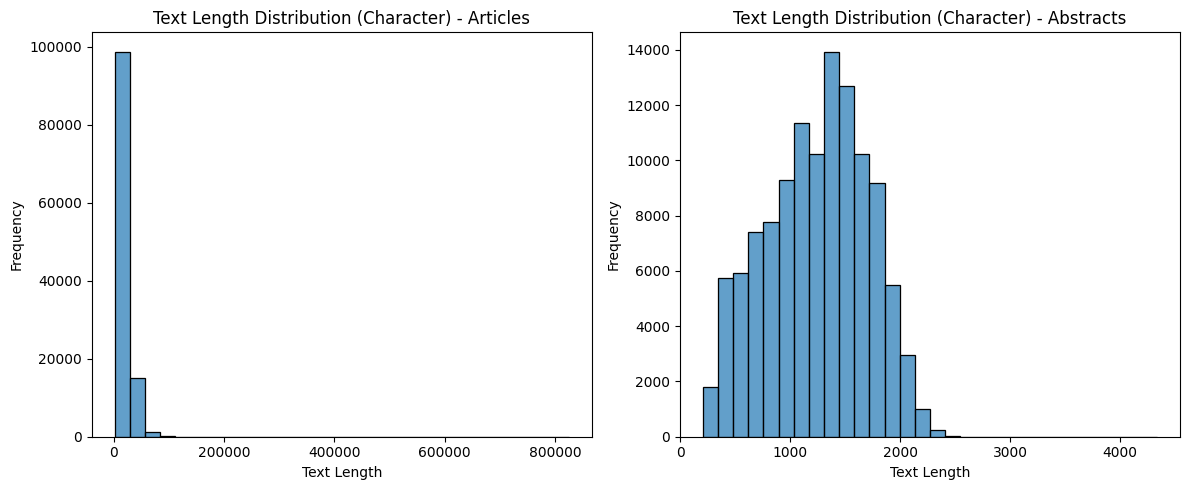

In [167]:
# histogram of text length (characters)
plt.figure(figsize=(12, 5))

# articles
plt.subplot(1, 2, 1)
sns.histplot(train_df['article'].astype(str).apply(len), bins=30, alpha=0.7)
plt.title('Text Length Distribution (Character) - Articles')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# abstract
plt.subplot(1, 2, 2)
sns.histplot(train_df['abstract'].astype(str).apply(len), bins=30, alpha=0.7)
plt.title('Text Length Distribution (Character) - Abstracts')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Word Counts

In [168]:
vectorizer = CountVectorizer()

# total word counts
total_abstract_word_count = vectorizer.fit_transform(train_df['abstract']).sum(axis=1)
total_article_word_count = vectorizer.fit_transform(train_df['article']).sum(axis=1)

# average word counts
average_abstract_word_count = total_abstract_word_count.mean()
average_article_word_count = total_article_word_count.mean()

print(f'Average Article Word Count: {average_article_word_count}')
print(f'Average Abstract Word Count: {average_abstract_word_count}')

Average Article Word Count: 2606.20491220772
Average Abstract Word Count: 172.81166692666355


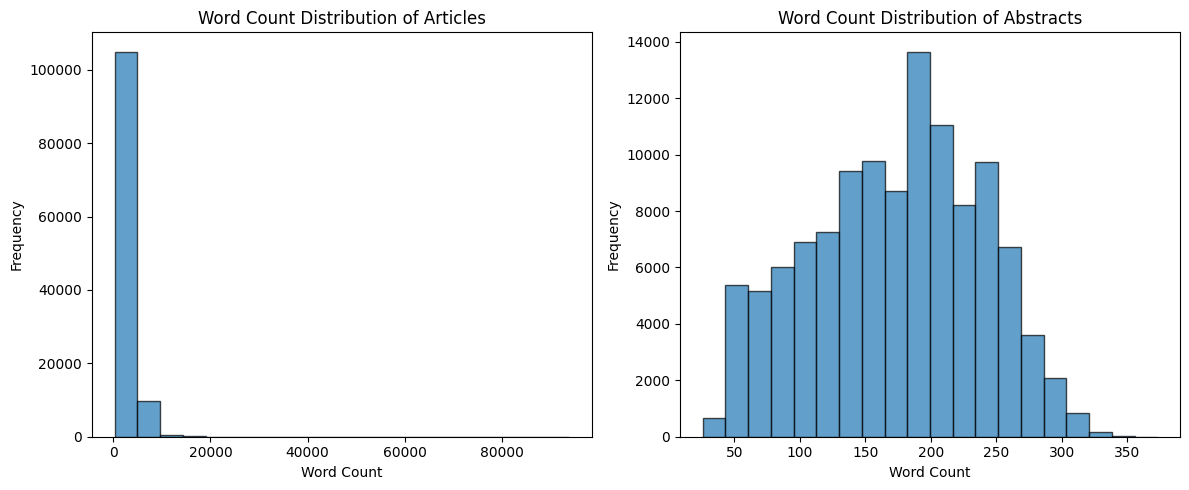

In [169]:
# histogram of word counts
abstract_word_counts = total_abstract_word_count.A.flatten()
article_word_counts = total_article_word_count.A.flatten()

plt.figure(figsize=(12, 5))

# articles
plt.subplot(1, 2, 1)
plt.hist(article_word_counts, bins=20, edgecolor='black', alpha=0.7)
plt.title('Word Count Distribution of Articles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# abstracts
plt.subplot(1, 2, 2)
plt.hist(abstract_word_counts, bins=20, edgecolor='black', alpha=0.7)
plt.title('Word Count Distribution of Abstracts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## WordCloud

In [170]:
# function to plot wordcloud

def plot_wordcloud(df, column_name, title='Word Cloud'):
    """
    plot a word cloud from a specified column of a df.
    """
    text = ' '.join(df[column_name].astype(str))

    wordcloud = WordCloud(width=800, height=400, collocations=False,
                          max_font_size=180, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

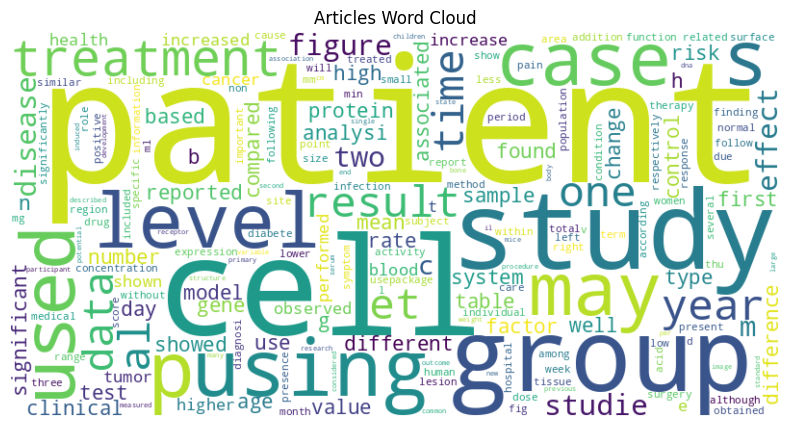

In [173]:
# article wordcloud
plot_wordcloud(train_df, 'article', title='Articles Word Cloud')

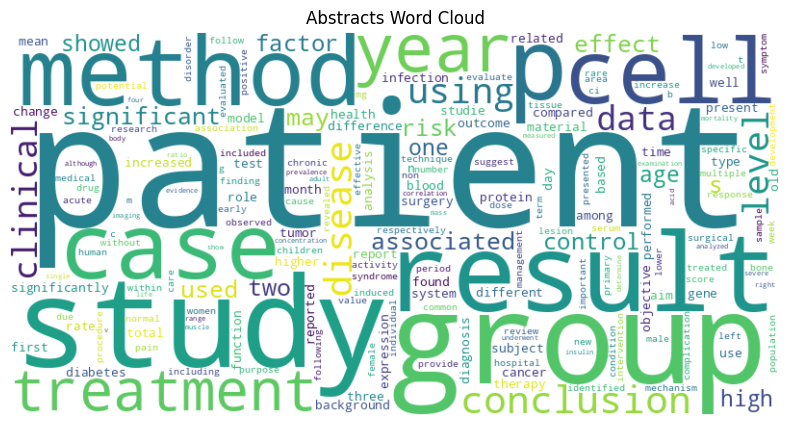

In [174]:
# article wordcloud
plot_wordcloud(train_df, 'abstract', title='Abstracts Word Cloud')